<a href="https://colab.research.google.com/github/joaorosa2/analise_combustiveis_brasil/blob/main/ProjetoM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol no Brasil com dados dos meses de julho e agosto.

#<font color = orange> Importando bibliotecas e arquivos

In [ ]:
#Importando as bibliotecas necessariass para as analises
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn

In [ ]:
#Importando os dados necessarios para realizar as analises 
tabelaAgosto  = pd.read_csv('https://raw.githubusercontent.com/joaorosa2/analise_combustiveis_brasil/main/precos-gasolina-etanol-Agosto.csv',sep= ';',engine= 'python')
tabelaJulho = pd.read_csv('https://raw.githubusercontent.com/joaorosa2/analise_combustiveis_brasil/main/precos-gasolina-etanol-Julho.csv',sep= ';',engine= 'python')

**Consultando os dados**

##<font color = orange> Mês de Julho

In [ ]:
#Consultando a quantidade de linhas e colunas do dataframe de julho.
tabelaJulho.shape

In [ ]:
#Consultando as 5 primeiras linhas.
tabelaJulho.head()

In [ ]:
#Consultando as 5 últimas linhas.
tabelaJulho.tail()

In [ ]:
#Descrição das colunas
display(tabelaJulho.dtypes)

##<font color = orange> Mês de Agosto

In [ ]:
##Consultando a quantidade de linhas e colunas do dataframe de agosto.
tabelaAgosto.shape

In [ ]:
#Consultando as  primeiras linhas.
tabelaAgosto.head()

In [ ]:
#Consultando as 5 últimas linhas.
tabelaAgosto.tail()

In [ ]:
#Descrição das colunas
display(tabelaAgosto.dtypes)

**Buscando informações a porcentagem de colunas que possuem valores ausentes**

In [ ]:
(tabelaAgosto.isnull().sum() / tabelaAgosto.shape[0]).sort_values(ascending=False)

**Resultado:**
*   Foi possivel identificar que nenhum ponto de revenda declarou o valor de compra dos combustiveis, pois a coluna **`Valor de Compra`** possui todos os valores ausentes(NaN).
*   A coluna Valor **`Complemento`**, sendo uma informação extra de localização possui 78% dos valores ausentes(NaN).
*   As colunas **`Bairro`** e **`Numero Rua`** possuem aproximadamente 0,1% dos valores ausentes(NaN).
*   As demais colunas não possuem valores ausentes.



In [ ]:
tabelaAgosto[['Valor de Venda', '']].describe()

,Valor de Venda
count,69544
unique,401
top,"5,49"
freq,3280


#<font color = orange> Limpeza e adaptação dos dados:

Mudando o tipo da coluna "Valor de venda" para float.
1. Função lambda para trocar Virgula por ponto com o "replace";
2. "astype" para mudar de string para float.



In [ ]:
colocaPonto = lambda x: x.replace(',','.')

tabelaJulho['Valor de Venda'] =(tabelaJulho['Valor de Venda'].apply(colocaPonto)).astype(str).astype(float)
tabelaAgosto['Valor de Venda'] = (tabelaAgosto['Valor de Venda'].apply(colocaPonto)).astype(str).astype(float)

Retirando as colunas **Nome da Rua**, **Numero Rua** e **Complemento** para limpar os dados da **tabelaJulho** e **tabelaAgosto** do nosso dataframe.

In [ ]:
tabelaAgosto = tabelaAgosto.drop('Nome da Rua', axis=1)
tabelaAgosto = tabelaAgosto.drop('Numero Rua', axis=1)
tabelaAgosto = tabelaAgosto.drop('Complemento', axis=1)
tabelaAgosto = tabelaAgosto.drop('Valor de Compra',axis=1)
########################################################################
tabelaJulho = tabelaJulho.drop('Nome da Rua', axis=1)
tabelaJulho = tabelaJulho.drop('Numero Rua', axis=1)
tabelaJulho = tabelaJulho.drop('Complemento', axis=1)
tabelaJulho = tabelaJulho.drop('Valor de Compra',axis=1)

tabelaJulho.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,LACE,29703-030,GASOLINA,01/07/2022,"7,38",R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,LACE,29703-055,ETANOL,01/07/2022,"5,99",R$ / litro,VIBRA ENERGIA


In [ ]:
tabelaAgosto.head(3)

#<font color = orange> 1- Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol eda gasolina tiveram uma de queda ou diminuição?

In [ ]:
tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto']]).mean()

,Valor de Venda
Produto,
ETANOL,4.759239
GASOLINA,6.059047
GASOLINA ADITIVADA,6.238814


In [ ]:
tabelaAgosto[['Valor de Venda']].groupby(tabelaAgosto['Produto']).mean()

,Valor de Venda
Produto,
ETANOL,4.296892
GASOLINA,5.423378
GASOLINA ADITIVADA,5.596107


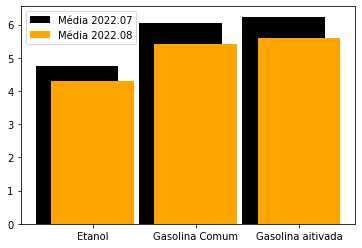

In [ ]:
import matplotlib.pyplot as plt


rotulos = ['Etanol','Gasolina Comum','Gasolina aitivada']
ind = np.arange(len(rotulos))
width = 0.6

bar_2207 = plt.bar(ind, list(tabelaJulho['Valor de Venda'].groupby(tabelaJulho['Produto']).mean()), color='black', label='Média 2022.07')
bar_2208 = plt.bar(ind+width/4,list(tabelaAgosto['Valor de Venda'].groupby(tabelaAgosto['Produto']).mean()), color='orange', label='Média 2022.08')

location = ind+width/4
rotulos=rotulos
plt.xticks(location, rotulos)
plt.legend();

Explicaçã breve do que houve com as médias dos preços 

#<font color = orange>2- Qual o preço médio da gasolina e do etanol nesses dois meses?

##<font color = orange> Mês de Julho

In [ ]:
tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto']]).mean()

,Valor de Venda
Produto,
ETANOL,4.759239
GASOLINA,6.059047
GASOLINA ADITIVADA,6.238814


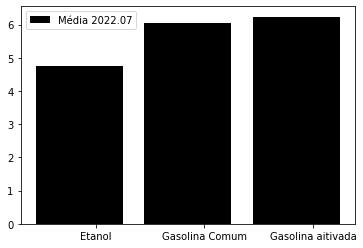

In [ ]:
import matplotlib.pyplot as plt
rotulos = ['Etanol','Gasolina Comum','Gasolina aitivada']
ind = np.arange(len(rotulos))
width = 0.6

bar_2207 = plt.bar(ind, list(tabelaJulho['Valor de Venda'].groupby(tabelaJulho['Produto']).mean()), color='black', label='Média 2022.07')

location = ind+width/4
rotulos=rotulos
plt.xticks(location, rotulos)
plt.legend();

##<font color = orange>Mês de Agosto

In [ ]:
tabelaAgosto[['Valor de Venda']].groupby(tabelaAgosto['Produto']).mean()

,Valor de Venda
Produto,
ETANOL,4.296892
GASOLINA,5.423378
GASOLINA ADITIVADA,5.596107


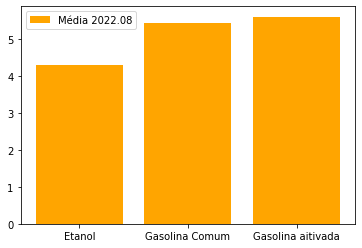

In [ ]:

rotulos = ['Etanol','Gasolina Comum','Gasolina aitivada']
ind = np.arange(len(rotulos))
width = 0.6

bar_2208 = plt.bar(ind+width/4,list(tabelaAgosto['Valor de Venda'].groupby(tabelaAgosto['Produto']).mean()), color='orange', label='Média 2022.08')

location = ind+width/4
rotulos=rotulos
plt.xticks(location, rotulos)
plt.legend();

#<font color = orange> 3- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

##<font color = orange> Mês de Julho

In [ ]:
mediaPorEstadoJulho = tabelaJulho.groupby(['Produto','Estado - Sigla'])[['Valor de Venda']].mean()



maxEtanol = mediaPorEstadoJulho.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxEtanol['Produto'] = 'ETANOL'

maxGasolina = mediaPorEstadoJulho.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxGasolina['Produto'] = 'GASOLINA'

maxAditivada = mediaPorEstadoJulho.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxAditivada['Produto'] = 'GASOLINA ADITIVADA'

concatMax = pd.concat([maxEtanol,maxGasolina,maxAditivada]).reset_index()
concatMax.set_index('Produto')


,Estado - Sigla,Valor de Venda
Produto,,
ETANOL,AP,5.976667
ETANOL,PA,5.942328
ETANOL,RS,5.940913
ETANOL,RO,5.909449
ETANOL,RN,5.886059
GASOLINA,AM,6.614281
GASOLINA,PI,6.607518
GASOLINA,RN,6.565826
GASOLINA,BA,6.502605


##<font color = orange> Mês de Agosto

In [ ]:
mediaPorEstadoAgosto = tabelaAgosto.groupby(['Produto','Estado - Sigla'])[['Valor de Venda']].mean()



maxEtanol = mediaPorEstadoAgosto.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxEtanol['Produto'] = 'ETANOL'

maxGasolina = mediaPorEstadoAgosto.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxGasolina['Produto'] = 'GASOLINA'

maxAditivada = mediaPorEstadoAgosto.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxAditivada['Produto'] = 'GASOLINA ADITIVADA'

concatMax = pd.concat([maxEtanol,maxGasolina,maxAditivada]).reset_index()
concatMax


,Estado - Sigla,Valor de Venda,Produto
0,AP,5.655000,ETANOL
1,RR,5.467778,ETANOL
2,RS,5.426271,ETANOL
3,PA,5.349541,ETANOL
4,RO,5.348089,ETANOL
5,AC,5.978333,GASOLINA
6,AM,5.846126,GASOLINA
7,RR,5.785077,GASOLINA
8,TO,5.746133,GASOLINA
9,PA,5.708955,GASOLINA


#<font color = orange> 4- Qual o preço médio da gasolina e do etanol por estado?

In [ ]:
#Realizando os calculos da média dos produtos por estado no mês de julho
dfjulho = tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto'], tabelaJulho['Estado - Sigla']]).mean()
dfjulho

In [ ]:
#Alterando o nome das colunas
dfjulho.rename(columns={'Valor de Venda':'Média do Valor'},inplace=True)
dfjulho

In [ ]:
#Realizando os calculos da média dos produtos por estado no mês de agosto
dfagosto = tabelaAgosto[['Valor de Venda']].groupby([tabelaAgosto['Produto'], tabelaAgosto['Estado - Sigla']]).mean()

In [ ]:
#Alterando o nome das colunas
dfagosto.rename(columns={'Valor de Venda':'Média do Valor'},inplace=True)
dfagosto

Média do Valor
Produto            Estado - Sigla                
ETANOL             AC                    5.128641
                   AL                    5.030152
                   AM                    4.763493
                   AP                    5.655000
                   BA                    4.770243
...                                           ...
GASOLINA ADITIVADA RS                    5.468107
                   SC                    5.558880
                   SE                    5.261623
                   SP                    5.523399
                   TO                    5.889279

[81 rows x 1 columns]

#<font color = orange> 5. Qual o município que possui o menor preço para a gasolina e para o etanol?

In [ ]:
minimaPorMunicipioJulho = tabelaJulho.groupby(['Produto','Municipio'])[['Valor de Venda']].min()




minEtanol = minimaPorMunicipioJulho.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = True).head(1)
minEtanol['Produto'] = 'ETANOL'

minGasolina = minimaPorMunicipioJulho.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = True).head(1)
minGasolina['Produto'] = 'GASOLINA'

minAditivada = minimaPorMunicipioJulho.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = True).head(1)
minAditivada['Produto'] = 'GASOLINA ADITIVADA'

concatMins = pd.concat([minEtanol,minGasolina,minAditivada]).reset_index()
concatMins


,Municipio,Valor de Venda,Produto
0,PASSOS,3.39,ETANOL
1,MOGI MIRIM,4.92,GASOLINA
2,GARCA,4.99,GASOLINA ADITIVADA


In [ ]:
minimaPorMunicipio = tabelaAgosto.groupby(['Produto','Municipio'])[['Valor de Venda']].min()




minEtanol = minimaPorMunicipio.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = True).head(1)
minEtanol['Produto'] = 'ETANOL'

minGasolina = minimaPorMunicipio.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = True).head(1)
minGasolina['Produto'] = 'GASOLINA'

minAditivada = minimaPorMunicipio.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = True).head(1)
minAditivada['Produto'] = 'GASOLINA ADITIVADA'

concatMins = pd.concat([minEtanol,minGasolina,minAditivada]).reset_index()
concatMins

,Municipio,Valor de Venda,Produto
0,PRESIDENTE PRUDENTE,2.89,ETANOL
1,PASSO FUNDO,4.13,GASOLINA
2,PASSO FUNDO,4.13,GASOLINA ADITIVADA


In [ ]:

correlacao = tabelaJulho.corr()
correlacao
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlacao, annot=True)
# plt.show()

,Valor de Venda,Valor de Compra
Valor de Venda,1.0,NaN
Valor de Compra,NaN,NaN



#<font color = orange> 6 - Qual o município que possui o maior preço para a gasolina e para o etanol?

- <font color = orange> Município com preço da gasolina e do etanol mais caro no mês de Julho

In [ ]:
maximoPorMunicipio = tabelaJulho.groupby(['Produto','Municipio'])[['Valor de Venda']].max()

maxEtanol = maximoPorMunicipio.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = False).head(1)
maxEtanol['Produto'] = 'ETANOL'

maxGasolina = maximoPorMunicipio.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = False).head(1)
maxGasolina['Produto'] = 'GASOLINA'

maxAditivada = maximoPorMunicipio.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = False).head(1)
maxAditivada['Produto'] = 'GASOLINA ADITIVADA'

concatMins = pd.concat([maxEtanol,maxGasolina,maxAditivada]).reset_index()
concatMins

,Municipio,Valor de Venda,Produto
0,BAGE,7.89,ETANOL
1,CRATEUS,8.52,GASOLINA
2,MAGE,9.27,GASOLINA ADITIVADA


- <font color = orange> Município com preço da gasolina e do etanol mais caro no mês de Agosto

In [ ]:
maximoPorMunicipio = tabelaAgosto.groupby(['Produto','Municipio'])[['Valor de Venda']].max()

maxEtanol = maximoPorMunicipio.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = False).head(1)
maxEtanol['Produto'] = 'ETANOL'

maxGasolina = maximoPorMunicipio.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = False).head(1)
maxGasolina['Produto'] = 'GASOLINA'

maxAditivada = maximoPorMunicipio.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = False).head(1)
maxAditivada['Produto'] = 'GASOLINA ADITIVADA'

concatMins = pd.concat([maxEtanol,maxGasolina,maxAditivada]).reset_index()
concatMins

,Municipio,Valor de Venda,Produto
0,CAXIAS DO SUL,7.19,ETANOL
1,GURUPI,8.75,GASOLINA
2,JAGUAQUARA,8.82,GASOLINA ADITIVADA


#<font color = orange> 7 - Qual a região que possui o maior valor médio da gasolina?

<Font color = orange> Mês de Julho:

In [ ]:
#Média gasolina com base nos meses de julho
mediaGasolinaRegiaojulho = tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto'] == 'Gasolina', tabelaJulho['Regiao - Sigla']]).mean().max()
mediaGasolinaRegiaojulho

<Font color = orange> Mês de Agosto:

In [ ]:
#Média gasolina com base nos meses de agosto
mediaGasolinaRegiaoagosto = tabelaAgosto[['Valor de Venda']].groupby([tabelaAgosto['Produto'] == 'Gasolina', tabelaAgosto['Regiao - Sigla']]).mean().max()
mediaGasolinaRegiaoagosto

<Font color = orange> Mês de agosto e julho:

In [ ]:
#Média gasolina com base nos meses de julho e agosto
mediaGasolinaRegiao2 = tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto'] == 'Gasolina', tabelaJulho['Regiao - Sigla']]), tabelaAgosto[['Valor de Venda']].groupby([tabelaAgosto['Produto'] == 'Gasolina', tabelaAgosto['Regiao - Sigla']]).mean().max()
mediaGasolinaRegiao2

#<font color = orange> 8 - Qual a região que possui o menor valor médio do etanol?

<Font color = orange> Mês de Julho:

In [ ]:
#Média etanol com base nos meses de julho
mediaGasolinaRegiaojulho = tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto'] == 'Etanol', tabelaJulho['Regiao - Sigla']]).mean().min()
mediaGasolinaRegiaojulho

<Font color = orange> Mês de Agosto:

In [ ]:
#Média etanol com base nos meses de agosto
mediaGasolinaRegiaoagosto = tabelaAgosto[['Valor de Venda']].groupby([tabelaAgosto['Produto'] == 'Etanol', tabelaAgosto['Regiao - Sigla']]).mean().min()
mediaGasolinaRegiaoagosto

<Font color = orange> Mês de agosto e julho:

In [ ]:
#Média gasolina com base nos meses de julho e agosto
mediaGasolinaRegiao2 = tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto'] == 'Etanol', tabelaJulho['Regiao - Sigla']]), tabelaAgosto[['Valor de Venda']].groupby([tabelaAgosto['Produto'] == 'Gasolina', tabelaAgosto['Regiao - Sigla']]).mean().min()
mediaGasolinaRegiao2

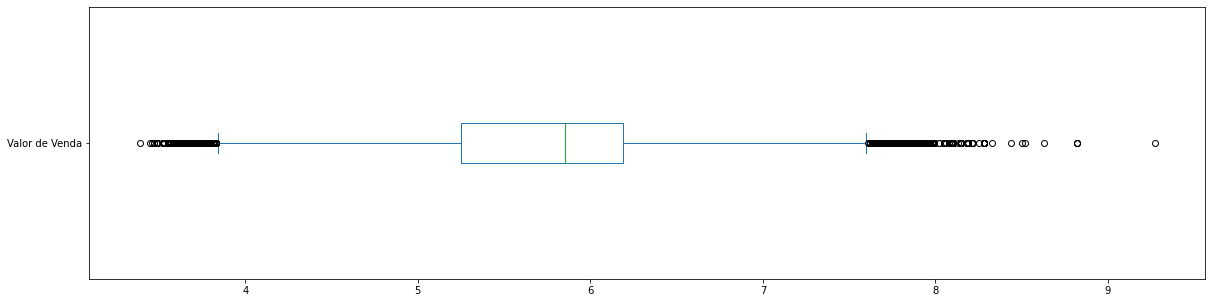

In [ ]:
tabelaJulho['Valor de Venda'].plot.box(vert= False, figsize=(20,5));

#<font color = orange> 9 - Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

<Font color = orange> Mês de Julho:

In [ ]:
correlacaoJulho = tabelaJulho.groupby(tabelaJulho['Regiao - Sigla']).corr()
correlacaoJulho

,,Valor de Venda
Regiao - Sigla,,
CO,Valor de Venda,1.0
N,Valor de Venda,1.0
NE,Valor de Venda,1.0
S,Valor de Venda,1.0
SE,Valor de Venda,1.0


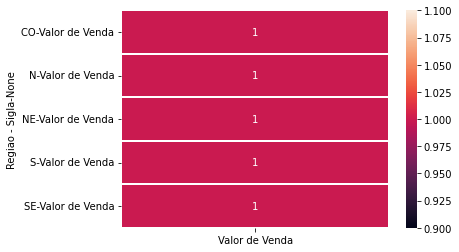

In [ ]:
plot = sn.heatmap(correlacaoJulho, annot =True, linewidths=.7)
plot;

<Font color = orange> Mês de Agosto:

In [ ]:
correlacaoAgosto = tabelaAgosto.groupby(tabelaAgosto['Regiao - Sigla']).corr()

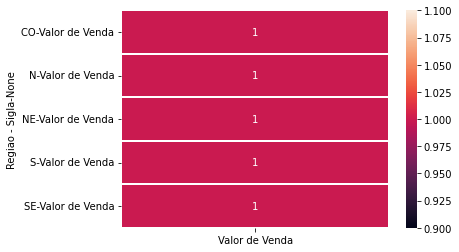

In [ ]:
plot = sn.heatmap(correlacaoAgosto, annot =True, linewidths=.7)
plot;

#<Font color = orange> 10 - Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?


##<Font color = orange> Mês de julho:

In [ ]:
correlacaoJulhoBand = tabelaJulho.groupby(tabelaJulho['Bandeira']).corr()
correlacaoJulhoBand

,,Valor de Venda
Bandeira,,
ALESAT,Valor de Venda,1.0
AMERICANOIL,Valor de Venda,1.0
ATEM' S,Valor de Venda,1.0
ATLÂNTICA,Valor de Venda,1.0
BRANCA,Valor de Venda,1.0
CHARRUA,Valor de Venda,1.0
CIAPETRO,Valor de Venda,1.0
DIBRAPE,Valor de Venda,1.0
DISLUB,Valor de Venda,1.0


##<Font color = orange> Mês de Agosto:

In [ ]:
correlacaoAgostoBand= tabelaAgosto.groupby(tabelaAgosto['Bandeira']).corr()
correlacaoAgostoBand

,,Valor de Venda
Bandeira,,
ALESAT,Valor de Venda,1.0
AMERICANOIL,Valor de Venda,1.0
ATEM' S,Valor de Venda,1.0
ATLÂNTICA,Valor de Venda,1.0
BRANCA,Valor de Venda,1.0
CHARRUA,Valor de Venda,1.0
CIAPETRO,Valor de Venda,1.0
DIBRAPE,Valor de Venda,1.0
DISLUB,Valor de Venda,1.0
